## Iris Dataset Clustering using k-Means and Classification using kNN

In [249]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [250]:
iris = load_iris()

features = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2, shuffle=True)

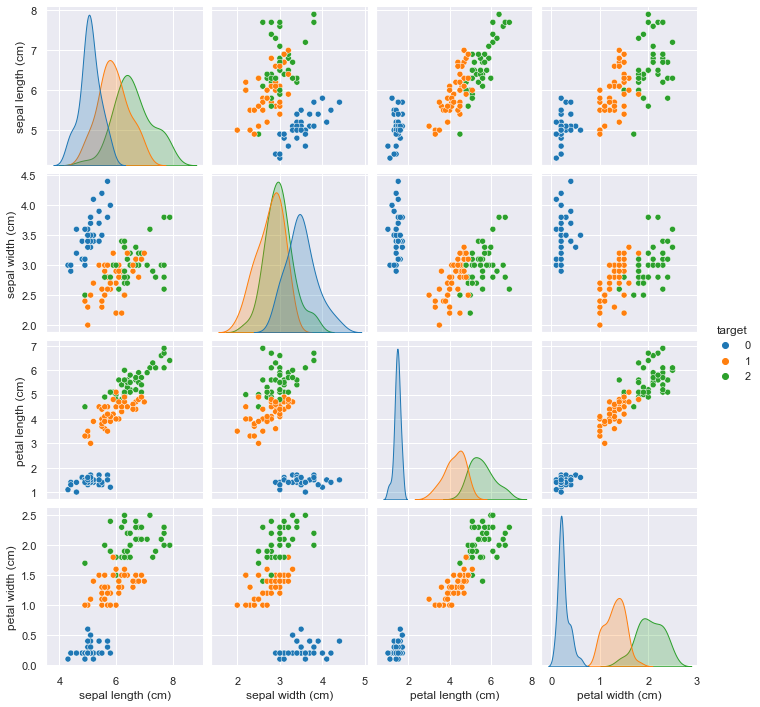

In [251]:
df_feature = pd.DataFrame(x_train, columns=feature_names)
df_target = pd.DataFrame(y_train, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

In [252]:
k = 3

k_means = KMeans(n_clusters=k, random_state=3)
k_means.fit(x_train, y_train)

centers = k_means.cluster_centers_
centers_label = [0, 1, 2]
labels = k_means.labels_
centers_label_name = [3, 3, 3]

features_cluster = np.concatenate([x_train, centers], axis=0)
labels_cluster = np.concatenate([labels, centers_label_name], axis=0)

score = metrics.accuracy_score(y_train, k_means.labels_)

print(features_cluster.shape)
print(labels_cluster.shape)
print("-----" * 10)
print("PC - Clustering Average Accuracy : %f" % score)

(123, 4)
(123,)
--------------------------------------------------
PC - Clustering Average Accuracy : 0.891667


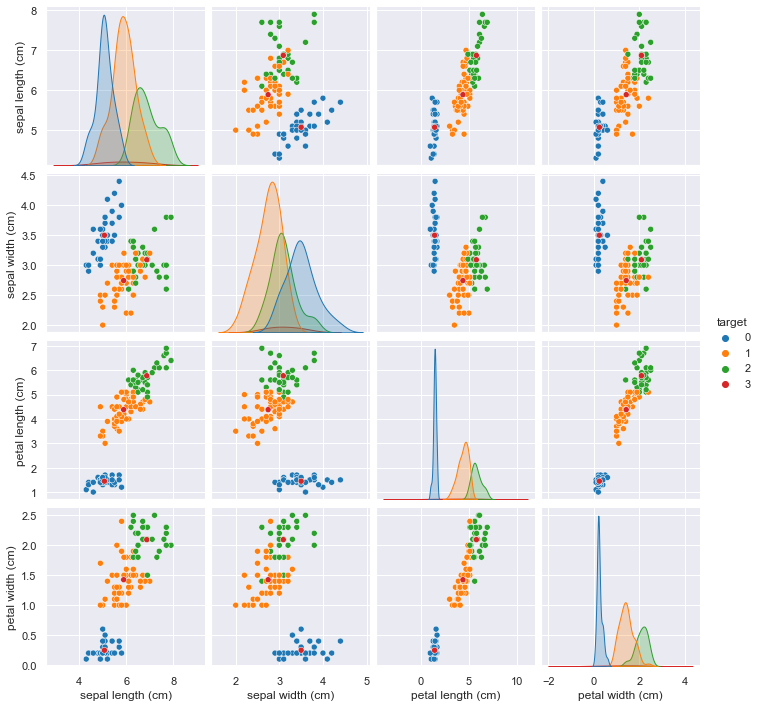

In [253]:
df_feature = pd.DataFrame(features_cluster, columns=feature_names)
df_target = pd.DataFrame(labels_cluster, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

In [254]:
comparison_acc = []
comparison_time = []

## kNN

In [255]:
# kNN
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_neighbors = 1

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

print("PC - kNN Average Accuracy : %f" % mean_acc)
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

PC - kNN Average Accuracy : 0.950000
PC - kNN Classification Time : 0.0105 sec


## k-Means & kNN

In [256]:
# k-Means & kNN
avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 3

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")

PC - k-means & kNN Average Accuracy : 0.803333
PC - Clustering Time : 0.0237 sec
PC - Classification Time : 0.0051 sec
PC - Total Time : 0.0288 sec


## PCA Feature 3 & k-Means & kNN

In [257]:
# PCA feature 3 & k-means & kNN
pca = PCA(n_components=3)
features = pca.fit(iris.data).transform(iris.data)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 3

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 3 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 3 & k-means & kNN Average Accuracy : 0.803333
PC - Clustering Time : 0.0242 sec
PC - Classification Time : 0.0058 sec
PC - Total Time : 0.0300 sec


## PCA Feature 2 & k-Means & kNN

In [258]:
# PCA feature 3 & k-means & kNN
pca = PCA(n_components=2)
features = pca.fit(iris.data).transform(iris.data)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 3

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 2 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 2 & k-means & kNN Average Accuracy : 0.800000
PC - Clustering Time : 0.0234 sec
PC - Classification Time : 0.0052 sec
PC - Total Time : 0.0286 sec


## Method Comparison

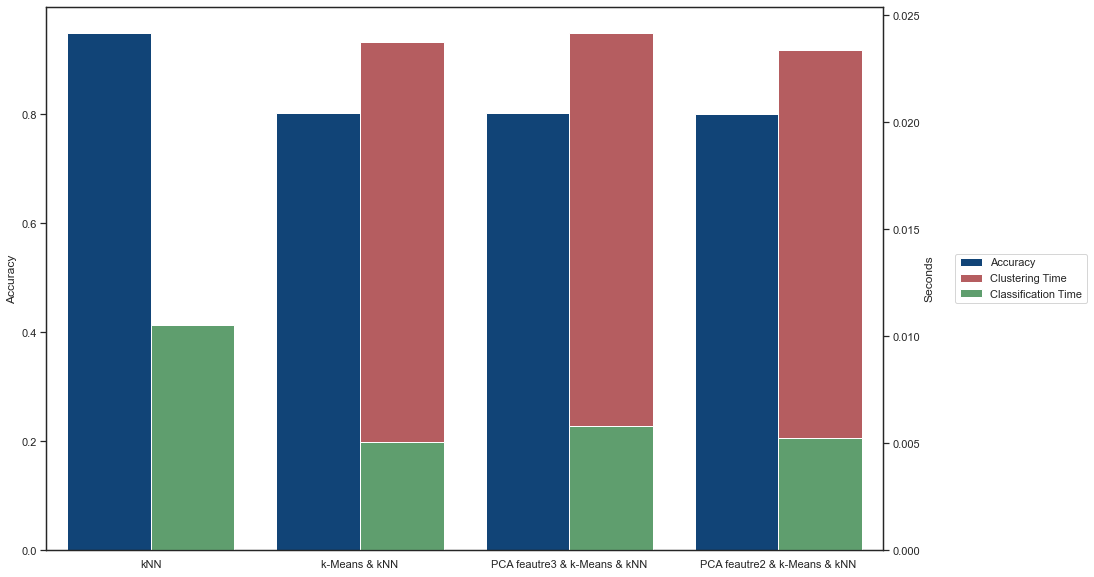

In [260]:
df_stack = pd.DataFrame(dict(
    score = [comparison_acc[0], comparison_acc[1], comparison_acc[2], comparison_acc[3]],
    cluster = [0, comparison_time[1], comparison_time[3], comparison_time[5]],
    classifier = [comparison_time[0], comparison_time[2], comparison_time[4], comparison_time[6]]
))

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

sns.barplot(x=["kNN", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"],
            y="score",
            data=df_stack,
            label="Accuracy",
            color='#004488',
            ax=ax1)

sns.barplot(x=["kNN", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="cluster",
            data=df_stack,
            label="Clustering Time",
            color='r',
            ax=ax2)

sns.barplot(x=["kNN", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="classifier",
            data=df_stack,
            label="Classification Time",
            color='g',
            ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

width_scale = 0.5

for bar in ax1.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

for bar_containers in ax2.containers:
    for bar in bar_containers:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)

plt.legend(lines, labels, loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()
sns.set()